In [53]:
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting

import pandas as pd #for data manipulation
from sklearn.model_selection import train_test_split
import random
np.random.seed(42)

#Data

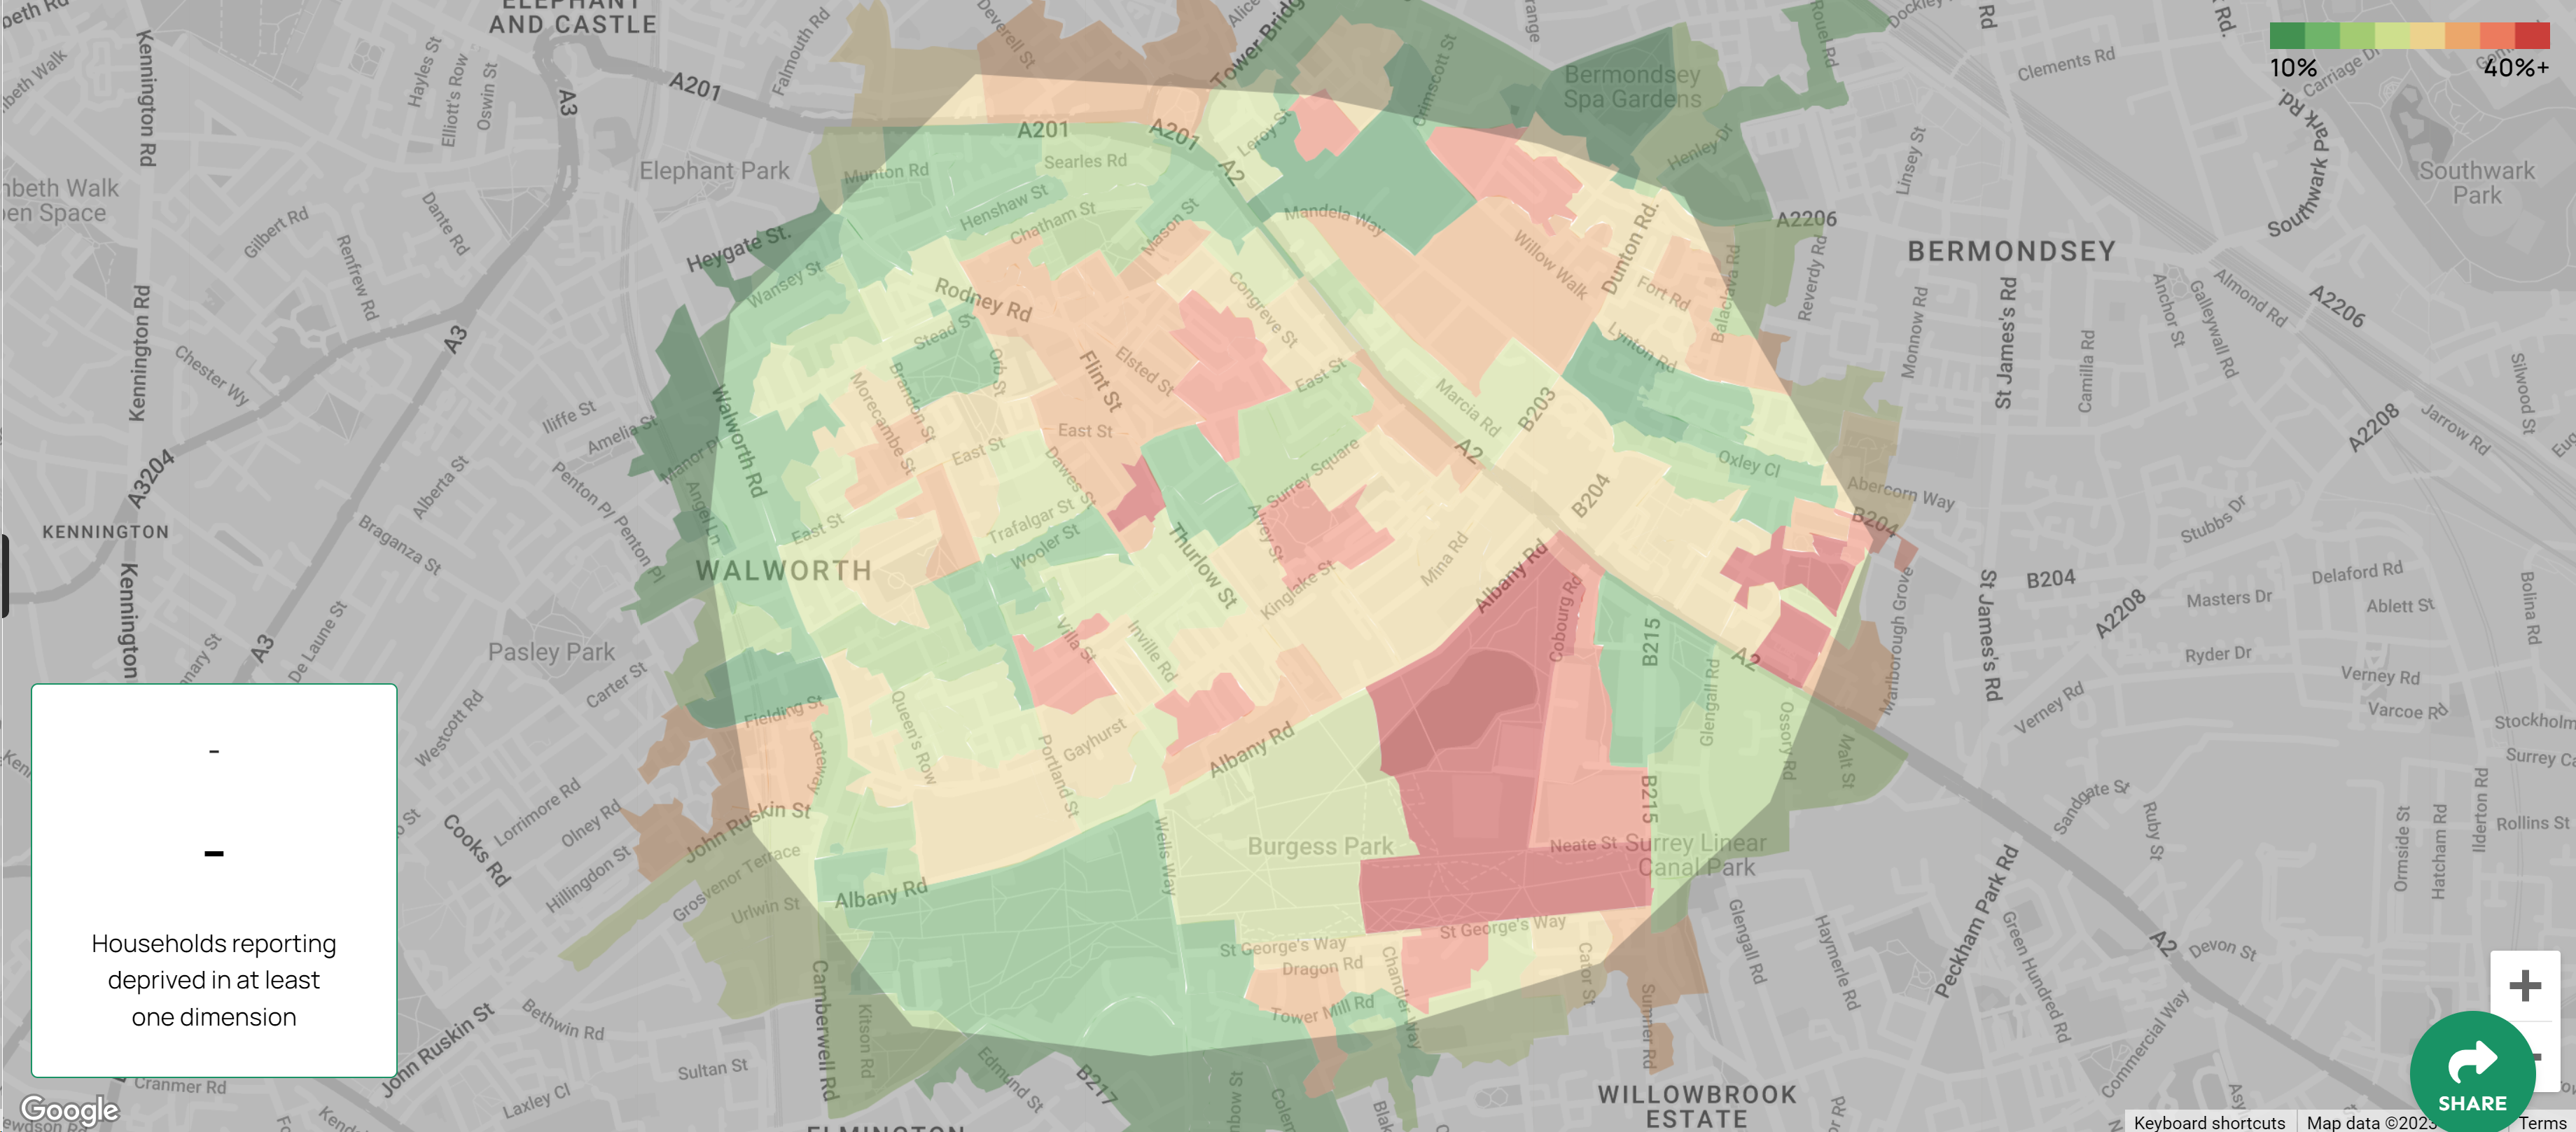

Source: PropertyData.co.uk

In [54]:
# Load data
#Make sure you upload csv in 'Files' folder icon on the left handside
data = pd.read_csv('south_east_sample_prices_sold_prices (2).csv')
data.head(5)
print('Number of training examples: ', data.shape[0])

Number of training examples:  431


In [55]:
# Convert 'Date' to datetime and extract year and month as new features
data['Date'] = pd.to_datetime(data['Date']) # Converting 'Date' column to datetime
data['Year'] = data['Date'].dt.year #Extracting year from 'Date'
data['Month'] = data['Date'].dt.month #Extracting month from 'Date'

# For 'Postcode', let's extract the area code which is the first part before the space
#E.g. SE15, SE16, SE17
data['Area_Code'] = data['Postcode'].apply(lambda x: x.split(' ')[0])

# Dropping the 'Date', 'Address', 'Postcode', and 'URL' columns as we won't use them in the model
data.drop(['Date', 'Address', 'Postcode', 'URL'], axis=1, inplace=True)

# One-hot encoding and feature preparation
#applies one hot encoding to feature columns that have categories i.e. represents the possible categories as unique columns with 1s or 0s
data = pd.get_dummies(data, drop_first=True)

#Separating our Features from what we are trying to predict (target variable)
X = data.drop(['Price paid'], axis=1)
#Our target variable
#prices are large values which will lead to errors between our predicted and actual values
#this can lead to a sensitive model to large values, so its better to use log which makes error distribution more uniform across data points
y = np.log(data['Price paid'])  # Log-transform the Price paid


# Display the first few rows to verify the changes
data.head()

#Area_Code_SE1, Type_Detached, Tenure_Freehold don't exist in the table because they are categories that exist implicitly when all other types or tenures are 0

Bedrooms  Price paid        Lat       Lng  Year  Month  Type_Flat  \
0         1      365000  51.489845 -0.074342  2023      3          0   
1         2      330000  51.485108 -0.091103  2023      3          1   
2         2      365000  51.490397 -0.085105  2023      3          1   
3         2      335000  51.488718 -0.094106  2023      2          1   
4         3      355000  51.487997 -0.081331  2023      2          1   

   Type_Semi-detached house  Type_Terraced house  New-build_Old stock  \
0                         0                    1                    1   
1                         0                    0                    1   
2                         0                    0                    1   
3                         0                    0                    1   
4                         0                    0                    1   

   Tenure_Leasehold  Area_Code_SE15  Area_Code_SE16  Area_Code_SE17  \
0                 0               0               0               0   
1                 1               0               0               1   
2                 1               0               0               1   
3                 1               0               0               1   
4                 1               0               0               1   

   Area_Code_SE5  
0              0  
1              0  
2              0  
3              0  
4              0

In [56]:
dict =  {keys:values for keys,values in zip(X.columns,[float for x in X.columns])}

X = X.astype(dict)


#X["Type_Flat"] = X["Type_Flat"].map(dict)
#X["Type_Semi-detached house"] = X["Type_Semi-detached house"].map(dict)
#X["New-build_Old stock"] = X["New-build_Old stock"].map(dict)
#X["Tenure_Leasehold"] = X["Tenure_Leasehold"].map(dict)
#X["Area_Code_SE15"] = X["Area_Code_SE15"].map(dict)
#X["Type_Terraced house"] = X["Type_Terraced house"].map(dict)
#X["Area_Code_SE16"] = X["Area_Code_SE16"].map(dict)
#X["Area_Code_SE17"] = X["Area_Code_SE17"].map(dict)
#X["Area_Code_SE5"] = X["Area_Code_SE5"].map(dict)

In [57]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bedrooms                  431 non-null    float64
 1   Lat                       431 non-null    float64
 2   Lng                       431 non-null    float64
 3   Year                      431 non-null    float64
 4   Month                     431 non-null    float64
 5   Type_Flat                 431 non-null    float64
 6   Type_Semi-detached house  431 non-null    float64
 7   Type_Terraced house       431 non-null    float64
 8   New-build_Old stock       431 non-null    float64
 9   Tenure_Leasehold          431 non-null    float64
 10  Area_Code_SE15            431 non-null    float64
 11  Area_Code_SE16            431 non-null    float64
 12  Area_Code_SE17            431 non-null    float64
 13  Area_Code_SE5             431 non-null    float64
dtypes: float64

In [58]:
X

Bedrooms        Lat       Lng    Year  Month  Type_Flat  \
0         1.0  51.489845 -0.074342  2023.0    3.0        0.0   
1         2.0  51.485108 -0.091103  2023.0    3.0        1.0   
2         2.0  51.490397 -0.085105  2023.0    3.0        1.0   
3         2.0  51.488718 -0.094106  2023.0    2.0        1.0   
4         3.0  51.487997 -0.081331  2023.0    2.0        1.0   
..        ...        ...       ...     ...    ...        ...   
426       3.0  51.492111 -0.094717  2017.0    8.0        0.0   
427       3.0  51.492111 -0.094717  2017.0    8.0        0.0   
428       2.0  51.486620 -0.075728  2017.0    7.0        1.0   
429       3.0  51.487911 -0.089272  2017.0    7.0        0.0   
430       1.0  51.493225 -0.091398  2017.0    7.0        1.0   

     Type_Semi-detached house  Type_Terraced house  New-build_Old stock  \
0                         0.0                  1.0                  1.0   
1                         0.0                  0.0                  1.0   
2                         0.0                  0.0                  1.0   
3                         0.0                  0.0                  1.0   
4                         0.0                  0.0                  1.0   
..                        ...                  ...                  ...   
426                       0.0                  1.0                  0.0   
427                       0.0                  1.0                  0.0   
428                       0.0                  0.0                  1.0   
429                       0.0                  1.0                  1.0   
430                       0.0                  0.0                  1.0   

     Tenure_Leasehold  Area_Code_SE15  Area_Code_SE16  Area_Code_SE17  \
0                 0.0             0.0             0.0             0.0   
1                 1.0             0.0             0.0             1.0   
2                 1.0             0.0             0.0             1.0   
3                 1.0             0.0             0.0             1.0   
4                 1.0             0.0             0.0             1.0   
..                ...             ...             ...             ...   
426               1.0             0.0             0.0             1.0   
427               1.0             0.0             0.0             1.0   
428               1.0             0.0             0.0             0.0   
429               0.0             0.0             0.0             1.0   
430               1.0             0.0             0.0             1.0   

     Area_Code_SE5  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
..             ...  
426            0.0  
427            0.0  
428            0.0  
429            0.0  
430            0.0  

[431 rows x 14 columns]

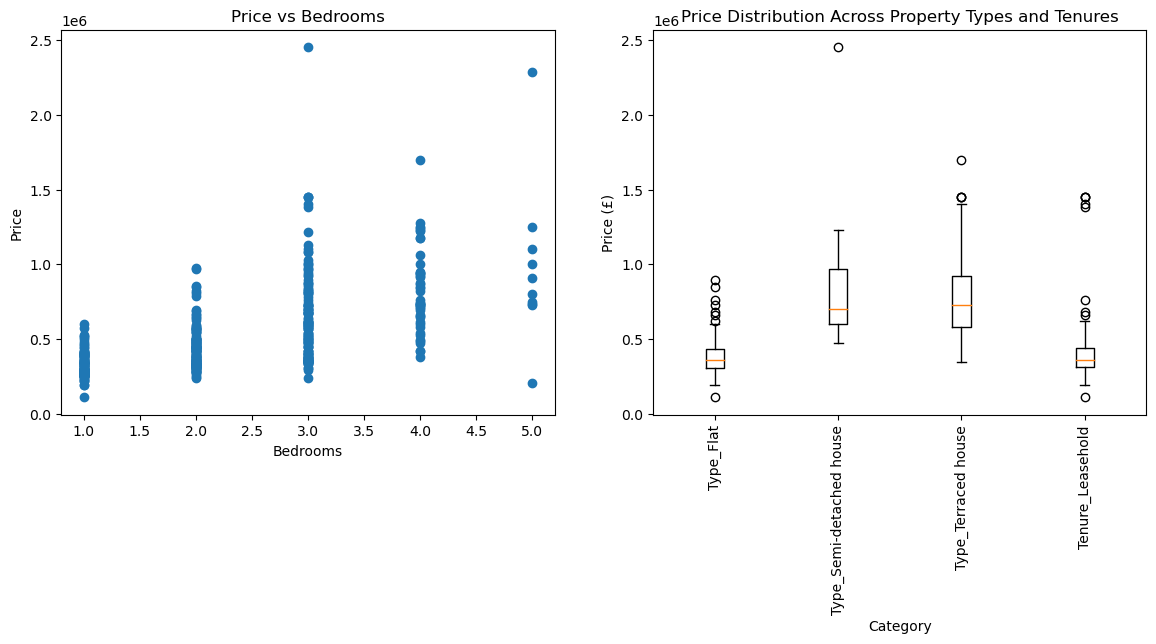

In [59]:
# Visualize the features against the price
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bedrooms vs Price
axs[0].scatter(data['Bedrooms'], np.exp(y))  # inverse log transform to original scale for visualization
axs[0].set_title('Price vs Bedrooms')
axs[0].set_xlabel('Bedrooms')
axs[0].set_ylabel('Price')

# One-hot encoded features vs Price
# Use box plots to show the distribution of prices for different property types and tenures
property_types = list(data.filter(regex='Type_').columns)
tenures = list(data.filter(regex='Tenure_').columns)

# Concatenate the property types and tenures for iteration
categories = property_types + tenures

for category in categories:
    # Create a boolean mask for each category
    mask = data[category] == 1
    # Apply the mask to the price and plot
    axs[1].boxplot(np.exp(y[mask]), positions=[categories.index(category)], labels=[category])

axs[1].set_title('Price Distribution Across Property Types and Tenures')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Price (£)')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

plt.show()

#Plot on the right shows some of our categorical variables (missing some categories like 'Type_Detached house' and 'Tenure_Freehold' )
#it shows we have quite a few outliers for price

In [60]:
# add a feature 1 to the dataset, then we do not need to consider the bias and weight separately
X = np.concatenate([np.ones([np.shape(X)[0], 1]), X], axis=1)

In [61]:
#Splitting data into training (60% of data) and test (40% of data) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(258, 15) (173, 15) (258,) (173,)


In [62]:
#cost function
def cost_function(X, y, w, lambda_reg):
   print(f"Shapes - X: {X.shape}, w: {w.shape}")  # Add this line for debugging
   N = X.shape[0]
   y_pred = np.dot(X, w)
   
   #mean square error loss with regularization, we don't regularize the bias term
   mse =  (1/N)*np.sum((y - y_pred)**2) + lambda_reg*np.sum(w[1:]**2)
   return mse

In [63]:
def grad_descent(X, y, no_iterations, lr, lambda_reg):

    N, D = X.shape
    # initialize all the weights to zeros
    w = np.zeros([D])
    alpha_2 = 1.0
    cost_history = []
    for i in range(no_iterations):
        y_pred = np.dot(w, X.T)
        #with regularization
        #avoiding bias term from regularization by adidng 0
        grad = (1/N)*X.T@(np.dot(w, X.T)-y) + 2*lambda_reg*w
        grad = np.array([g if g<=1.0 else 0.8 for g in grad])
        grad = np.array([g if g>=-1.0 else -0.8 for g in grad])
        print(grad, alpha_2)

        w_update = alpha_2 * lr* grad
        
        # Before updating the weights, print the intermediate values
        if i % 10 == 0:  # Print information every 10 iterations for brevity
            print(f"Iteration {i}:")
            print(f"Gradient: {grad}")
            print(f"Weight update: {w_update.dtype}")
            print(f"Current cost: {cost_history[-1] if i > 0 else 'N/A'}")
            print(f"Weights before update: {w}")
            print("-" * 40)

        if (i > 5000) & (i %10 == 0):
            alpha_2 = alpha_2/1.01
        w = w - w_update

        cost = cost_function(X, y, w, lambda_reg)
        cost_history.append(cost)
        
    return cost_history, y_pred, w


In [64]:
no_iterations=10000 
cost_history, y_pred, w = grad_descent(X_train, y_train, no_iterations, lr = 1e-3, lambda_reg = 1e-5)

[-0.8        -0.8        -0.8         0.8        -0.8        -0.8
 -0.8        -0.21273896 -0.8        -0.8        -0.8        -0.66193075
 -0.25331542 -0.8        -0.05160071] 1.0
Iteration 0:
Gradient: [-0.8        -0.8        -0.8         0.8        -0.8        -0.8
 -0.8        -0.21273896 -0.8        -0.8        -0.8        -0.66193075
 -0.25331542 -0.8        -0.05160071]
Weight update: float64
Current cost: N/A
Weights before update: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----------------------------------------
Shapes - X: (258, 15), w: (15,)
[-0.8        -0.8        -0.8         0.95998016 -0.8        -0.8
 -0.8        -0.18689288 -0.8        -0.8        -0.8        -0.57789032
 -0.22097925 -0.8        -0.04512433] 1.0
Shapes - X: (258, 15), w: (15,)
[-0.8        -0.8        -0.8         0.81970196 -0.8        -0.8
 -0.8        -0.16104699 -0.8        -0.8        -0.8        -0.49385351
 -0.18864349 -0.8        -0.03864792] 1.0
Shapes - X: (258, 15), w: (15,)
[-0.8    

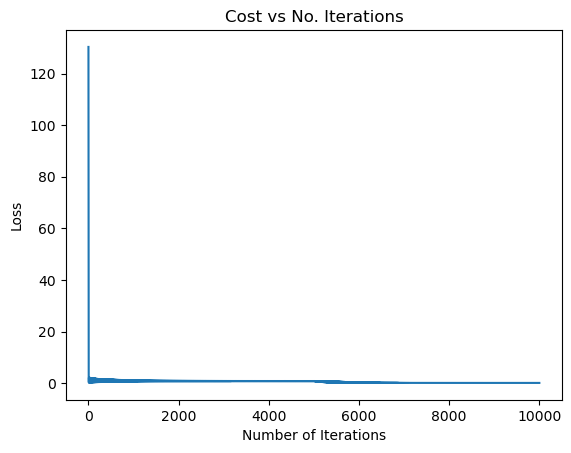

In [65]:
#Plots to see how the model has trained
plt.title('Cost vs No. Iterations')
plt.plot(range(no_iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

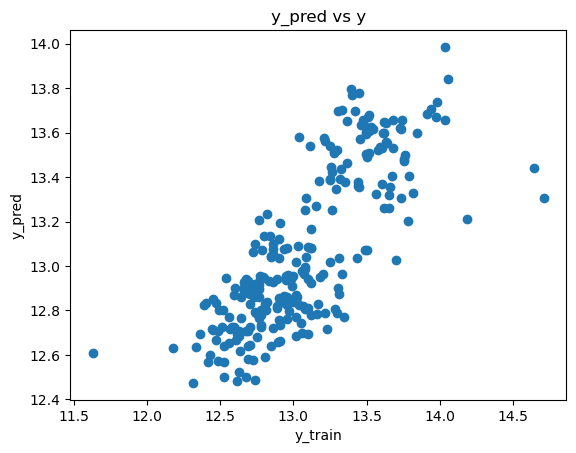

In [66]:
#y vs y_pred
plt.title('y_pred vs y')
plt.scatter(y_train, y_pred)
plt.xlabel('y_train')
plt.ylabel('y_pred')
plt.show()

In [67]:
y_pred

array([13.0790891 , 12.73373844, 12.64210347, 12.77247817, 12.72575029,
       13.02874328, 13.53017676, 13.25921811, 13.40241568, 12.52516295,
       13.06066956, 12.86142103, 13.54119589, 12.48419647, 12.84318093,
       13.65233961, 13.6769283 , 12.82593676, 12.9635523 , 13.57850878,
       13.76791618, 13.62483056, 12.8297486 , 13.07718482, 13.65673483,
       12.98604838, 13.59730109, 13.07697507, 12.68267287, 13.12154395,
       12.94484599, 13.7939255 , 12.95102181, 13.3851742 , 12.81165555,
       13.57671873, 13.53572384, 13.01565649, 13.69718899, 12.91537338,
       12.95620981, 13.52085671, 13.38902441, 12.78910749, 13.69718899,
       12.80196854, 12.93943842, 13.48035033, 12.90430048, 12.99497736,
       12.95460133, 12.71656925, 13.62113804, 13.53013505, 13.09742644,
       12.66615955, 13.50430339, 13.35366199, 12.56598152, 13.43702792,
       12.72771017, 13.10080837, 12.83776884, 13.19175981, 12.93739353,
       12.63666884, 12.69212355, 12.85956505, 13.30534838, 13.84

In [68]:
y_pred = np.dot(X,w)
y_pred = np.exp(y_pred) # Inverse log transform
y_true = np.exp(y)  # Inverse log transform

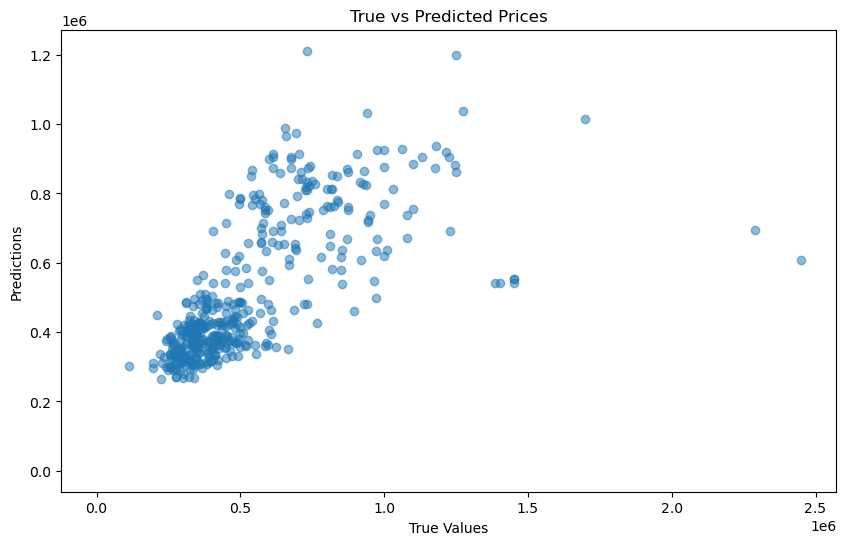

In [69]:
# Plot Predicted vs True for the dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Prices')
plt.show()

In [70]:
w_2 = np.linalg.pinv(X)@y
y_pred = np.dot(X,w_2)
y_pred = np.exp(y_pred)  # Inverse log transform
y_true = np.exp(y)  # Inverse log transform

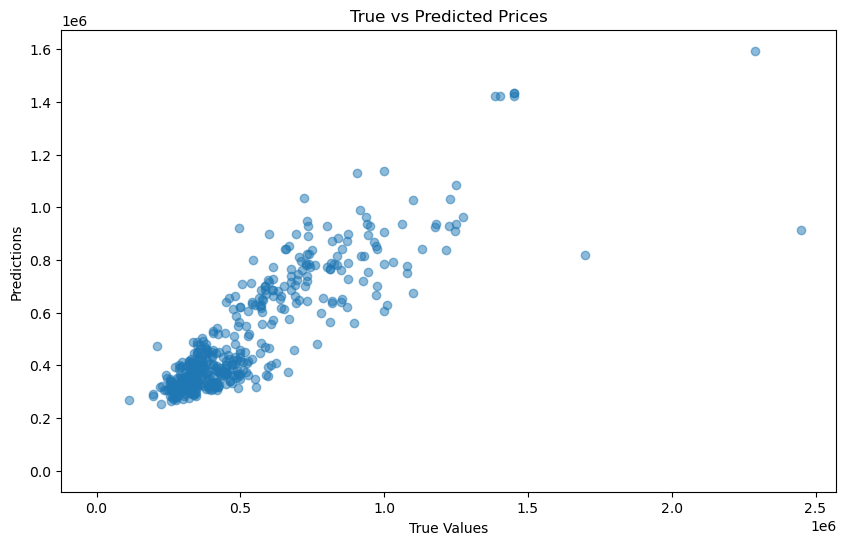

In [71]:
# Plot Predicted vs True for the dataset
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Prices')
plt.show()